In [67]:
import json
import requests
import pandas as pd

# JSON data

dpt = 'REG-04'
years = ['2019', '2020', '2021', '2022', '2023', '2024']

requete_dataset = f"https://api.insee.fr/melodi/data/DS_ESTIMATION_POPULATION?GEO={dpt}"

for year in years:
    requete_dataset += f"&TIME_PERIOD={year}"


# Charger les données depuis un fichier / url
# data_from_file = json_data.read()

get_data = requests.get(requete_dataset , verify= False)
data_from_net = get_data.content
data = json.loads(data_from_net )

# print(data)
# for key in data['observations']:
#     if key['SEX'] == '_T' and key['AGE'] == '_T':
#         print(key['OBS_VALUE_NIVEAU'])

# save data in file
with open('data.json', 'w') as f:
    json.dump(data, f)

# Datasets info 

title = data['title']['fr']
identifier = data['identifier']

# Extraire observations
observations = data['observations']

# Liste pour les observations
extracted_data = []

# Boucle de lecture des observations dans le json 
for obs in observations:
    dimensions = obs['dimensions']
    attributes = obs['attributes']
    measures = obs['measures']['OBS_VALUE_NIVEAU']['value']
    
    # Combiner dimensions, attributes, et measures dans un dict  
    combined_data = {**dimensions, **attributes, 'OBS_VALUE_NIVEAU': measures}
    
    # Ajouter à la liste
    extracted_data.append(combined_data)

# Création d'un dataframe python
df = pd.DataFrame(extracted_data)

# Affichage

print(f'Jeu de données : {identifier} \nTitre : {title} ')

print(df)
population_value = []

# drop rows with EP_MEASURE != 'POP'
df = df[df['EP_MEASURE'] == 'POP']
df = df[df['SEX'] == '_T']

df.drop(columns=['EP_MEASURE', 'SEX', 'OBS_STATUS_FR', 'GEO'], inplace=True)

# population_value.append(df[(df['SEX'] == '_T') & (df['AGE'] == '_T') & (df['EP_MEASURE'] == 'POP') & (df['TIME_PERIOD'] == '2019')]['OBS_VALUE_NIVEAU'].values)
# population_value.append(df[(df['SEX'] == '_T') & (df['AGE'] == '_T') & (df['EP_MEASURE'] == 'POP') & (df['TIME_PERIOD'] == '2020')]['OBS_VALUE_NIVEAU'].values)
# population_value.append(df[(df['SEX'] == '_T') & (df['AGE'] == '_T') & (df['EP_MEASURE'] == 'POP') & (df['TIME_PERIOD'] == '2021')]['OBS_VALUE_NIVEAU'].values)
# population_value.append(df[(df['SEX'] == '_T') & (df['AGE'] == '_T') & (df['EP_MEASURE'] == 'POP') & (df['TIME_PERIOD'] == '2022')]['OBS_VALUE_NIVEAU'].values)
# population_value.append(df[(df['SEX'] == '_T') & (df['AGE'] == '_T') & (df['EP_MEASURE'] == 'POP') & (df['TIME_PERIOD'] == '2023')]['OBS_VALUE_NIVEAU'].values)
# population_value.append(df[(df['SEX'] == '_T') & (df['AGE'] == '_T') & (df['EP_MEASURE'] == 'POP') & (df['TIME_PERIOD'] == '2024')]['OBS_VALUE_NIVEAU'].values)
# for value in population_value:
#     print(f'Population : {value}')

/Users/julienaudoux/Desktop/WORK(lab)/forecasting_models/.venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.insee.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Jeu de données : DS_ESTIMATION_POPULATION 
Titre : Estimations de population 
                                                   GEO SEX TIME_PERIOD  \
0    http://id.insee.fr/geo/region/5bc4db56-216e-41...   F        2022   
1    http://id.insee.fr/geo/region/5bc4db56-216e-41...   F        2020   
2    http://id.insee.fr/geo/region/5bc4db56-216e-41...  _T        2021   
3    http://id.insee.fr/geo/region/5bc4db56-216e-41...  _T        2020   
4    http://id.insee.fr/geo/region/5bc4db56-216e-41...  _T        2021   
..                                                 ...  ..         ...   
469  http://id.insee.fr/geo/region/5bc4db56-216e-41...   F        2020   
470  http://id.insee.fr/geo/region/5bc4db56-216e-41...   F        2022   
471  http://id.insee.fr/geo/region/5bc4db56-216e-41...  _T        2021   
472  http://id.insee.fr/geo/region/5bc4db56-216e-41...  _T        2023   
473  http://id.insee.fr/geo/region/5bc4db56-216e-41...   F        2024   

    EP_MEASURE     AGE OBS_STATUS

In [68]:
df

,TIME_PERIOD,AGE,OBS_VALUE_NIVEAU
2,2021,Y5T9,65287.0
3,2020,Y_GE75,44131.0
4,2021,Y85T89,7417.0
5,2020,Y70T74,27192.0
10,2019,Y85T89,6606.0
...,...,...,...
450,2021,Y80T84,13928.0
464,2019,Y45T49,60357.0
467,2019,Y20T39,207824.0
471,2021,Y20T24,49729.0


In [69]:
df_pivot = df.pivot(index='TIME_PERIOD', columns='AGE', values='OBS_VALUE_NIVEAU')
df_pivot

AGE,Y10T14,Y15T19,Y20T24,Y20T39,Y25T29,Y30T34,Y35T39,Y40T44,Y40T59,Y45T49,...,Y70T74,Y75T79,Y80T84,Y85T89,Y90T94,Y_GE75,Y_GE95,Y_LT20,Y_LT5,_T
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
2019,69551.0,67277.0,50440.0,207824.0,50800.0,52356.0,54228.0,56013.0,239477.0,60357.0,...,25772.0,18648.0,12929.0,6606.0,3105.0,42371.0,1083.0,260947.0,59504.0,861210.0
2020,68698.0,66399.0,49628.0,206054.0,49399.0,52648.0,54379.0,55641.0,239355.0,58553.0,...,27192.0,19422.0,13282.0,7075.0,3159.0,44131.0,1193.0,257801.0,58476.0,863083.0
2021,68950.0,65967.0,49729.0,205964.0,48205.0,53399.0,54631.0,56155.0,240622.0,58335.0,...,29112.0,19793.0,13928.0,7417.0,3256.0,45536.0,1142.0,257985.0,57781.0,871157.0
2022,68398.0,65992.0,49614.0,205233.0,47131.0,53628.0,54860.0,56564.0,240312.0,57124.0,...,30447.0,21055.0,14024.0,7959.0,3284.0,47569.0,1247.0,256920.0,57493.0,876409.0
2023,67939.0,66264.0,49897.0,205311.0,45913.0,54127.0,55374.0,56260.0,238734.0,56190.0,...,32269.0,22141.0,14427.0,8501.0,3257.0,49532.0,1206.0,255543.0,57116.0,880766.0
2024,67286.0,66982.0,49403.0,204026.0,44897.0,53779.0,55947.0,56614.0,237389.0,55707.0,...,34826.0,23258.0,15185.0,8726.0,3553.0,51907.0,1185.0,254322.0,56572.0,885700.0


In [70]:


# Step 1: Convert TIME_PERIOD to datetime format, assuming TIME_PERIOD is the year
df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'], format='%Y')

# Step 2: Create a full date range for each day of the year
# For example, for the year 2021:
date_range = pd.date_range(start='2019-01-01', end='2024-12-31', freq='D')

# Step 3: Reindex the DataFrame to include each day, assuming df_pivot is your pivoted DataFrame
df_pivot = df.pivot(index='TIME_PERIOD', columns='AGE', values='OBS_VALUE_NIVEAU')

# Reindexing the DataFrame to include the complete date range (using df_pivot from earlier)
df_pivot = df_pivot.reindex(date_range)
df_pivot = df_pivot.rename_axis('date')

df_pivot = df_pivot.interpolate(method='linear')

# Step 4: Fill missing values if necessary (e.g., with forward-fill or NaNs)
df_pivot.fillna(method='ffill', inplace=True)  # You can also use 'bfill' or leave as NaN


df_pivot = df_pivot.rename_axis(None, axis=1)


/var/folders/gq/_j9vvl_n7433hzjvr7g6tjgc0000gn/T/ipykernel_26346/2100828623.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot.fillna(method='ffill', inplace=True)  # You can also use 'bfill' or leave as NaN


In [71]:
df_pivot

,Y10T14,Y15T19,Y20T24,Y20T39,Y25T29,Y30T34,Y35T39,Y40T44,Y40T59,Y45T49,...,Y70T74,Y75T79,Y80T84,Y85T89,Y90T94,Y_GE75,Y_GE95,Y_LT20,Y_LT5,_T
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,69551.000000,67277.000000,50440.000000,207824.000000,50800.000000,52356.0,54228.000000,56013.000000,239477.000000,60357.000000,...,25772.000000,18648.000000,12929.000000,6606.000000,3105.000000,42371.000000,1083.000000,260947.000000,59504.000000,861210.000000
2019-01-02,69548.663014,67274.594521,50437.775342,207819.150685,50796.161644,52356.8,54228.413699,56011.980822,239476.665753,60352.057534,...,25775.890411,18650.120548,12929.967123,6607.284932,3105.147945,42375.821918,1083.301370,260938.380822,59501.183562,861215.131507
2019-01-03,69546.326027,67272.189041,50435.550685,207814.301370,50792.323288,52357.6,54228.827397,56010.961644,239476.331507,60347.115068,...,25779.780822,18652.241096,12930.934247,6608.569863,3105.295890,42380.643836,1083.602740,260929.761644,59498.367123,861220.263014
2019-01-04,69543.989041,67269.783562,50433.326027,207809.452055,50788.484932,52358.4,54229.241096,56009.942466,239475.997260,60342.172603,...,25783.671233,18654.361644,12931.901370,6609.854795,3105.443836,42385.465753,1083.904110,260921.142466,59495.550685,861225.394521
2019-01-05,69541.652055,67267.378082,50431.101370,207804.602740,50784.646575,52359.2,54229.654795,56008.923288,239475.663014,60337.230137,...,25787.561644,18656.482192,12932.868493,6611.139726,3105.591781,42390.287671,1084.205479,260912.523288,59492.734247,861230.526027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-27,67286.000000,66982.000000,49403.000000,204026.000000,44897.000000,53779.0,55947.000000,56614.000000,237389.000000,55707.000000,...,34826.000000,23258.000000,15185.000000,8726.000000,3553.000000,51907.000000,1185.000000,254322.000000,56572.000000,885700.000000
2024-12-28,67286.000000,66982.000000,49403.000000,204026.000000,44897.000000,53779.0,55947.000000,56614.000000,237389.000000,55707.000000,...,34826.000000,23258.000000,15185.000000,8726.000000,3553.000000,51907.000000,1185.000000,254322.000000,56572.000000,885700.000000
2024-12-29,67286.000000,66982.000000,49403.000000,204026.000000,44897.000000,53779.0,55947.000000,56614.000000,237389.000000,55707.000000,...,34826.000000,23258.000000,15185.000000,8726.000000,3553.000000,51907.000000,1185.000000,254322.000000,56572.000000,885700.000000


In [72]:
df_pivot = df_pivot.astype(int)

In [73]:
df_pivot = df_pivot.loc['2019-01-01':'2023-12-31']

In [74]:
df_pivot

,Y10T14,Y15T19,Y20T24,Y20T39,Y25T29,Y30T34,Y35T39,Y40T44,Y40T59,Y45T49,...,Y70T74,Y75T79,Y80T84,Y85T89,Y90T94,Y_GE75,Y_GE95,Y_LT20,Y_LT5,_T
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,69551,67277,50440,207824,50800,52356,54228,56013,239477,60357,...,25772,18648,12929,6606,3105,42371,1083,260947,59504,861210
2019-01-02,69548,67274,50437,207819,50796,52356,54228,56011,239476,60352,...,25775,18650,12929,6607,3105,42375,1083,260938,59501,861215
2019-01-03,69546,67272,50435,207814,50792,52357,54228,56010,239476,60347,...,25779,18652,12930,6608,3105,42380,1083,260929,59498,861220
2019-01-04,69543,67269,50433,207809,50788,52358,54229,56009,239475,60342,...,25783,18654,12931,6609,3105,42385,1083,260921,59495,861225
2019-01-05,69541,67267,50431,207804,50784,52359,54229,56008,239475,60337,...,25787,18656,12932,6611,3105,42390,1084,260912,59492,861230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,67294,66972,49409,204043,44910,53783,55939,56609,237407,55713,...,34790,23242,15174,8722,3548,51874,1185,254338,56579,885632
2023-12-28,67293,66974,49408,204040,44908,53782,55940,56610,237403,55712,...,34797,23245,15176,8723,3549,51880,1185,254335,56577,885645
2023-12-29,67291,66976,49407,204036,44905,53781,55942,56611,237400,55710,...,34804,23248,15178,8724,3550,51887,1185,254332,56576,885659


<Axes: xlabel='date'>

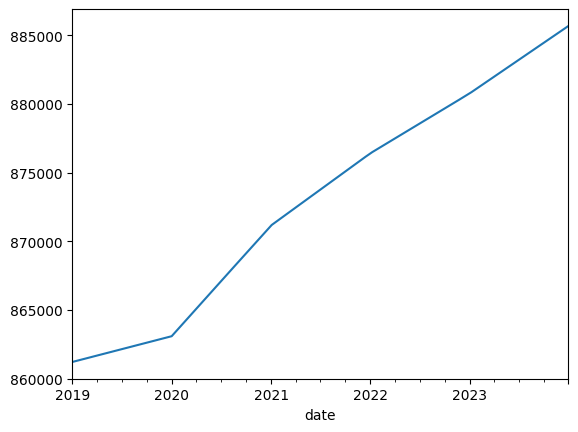

In [75]:
# plot data
df_pivot['_T'].plot()